# Chap 8 

- 출처 : 핸즈온 머신러닝(2판), [깃허브](https://github.com/codingalzi/handson-ml2/blob/master/notebooks/handson-ml2-08.ipynb)

In [1]:
# 파이썬 ≥3.5 필수
import sys
assert sys.version_info >= (3, 5)

# 사이킷런 ≥0.20 필수
import sklearn
assert sklearn.__version__ >= "0.20"

# 공통 모듈 임포트
import numpy as np
import os

# 노트북 실행 결과를 동일하게 유지하기 위해
np.random.seed(42)

# 깔끔한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# 그림을 저장할 위치
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "dim_reduction"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("그림 저장", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# 8.1 차원의 저주

차원의 저주는 <u>차원이 증가하면서 학습데이터 수가 차원 수보다 적어져서 성능이 저하되는 현상</u>을 일컫는다. 차원이 증가할수록 변수가 증가하고, 개별 차원 내에서 학습할 데이터 수가 적어진다. 이론적으로 차원의 저주를 해결하는 방법 중 하나는 훈련 샘플의 밀도가 충분히 높아질 때까지 훈련 세트의 크기를 키우는 방법이 있다. 하지만 아쉽게도 일정 밀도에 도달하기 위해 필요한 훈련 샘플 수는 차원의 수가 커짐에 따라 기하급수적으로 늘어난다.  

그래서 현실적으로 차원 축소로 차원의 저주를 해결하며 이후 설명할 예정이다. 

출처 : [차원의 저주 개념, 발생 원인과 해결 방법](https://for-my-wealthy-life.tistory.com/40)

# 8.2 차원 축소를 위한 접근 방법

## 8.2.1 투영

## 8.2.2 매니폴드 학습

Manifold Learning이란 고차원 데이터가 있을 때 고차원 데이터를 데이터 공간에 뿌리면 샘플들을 잘 아우르는 subspace가 있을 것이라 가정에서 학습을 진행하는 방법이다. Manifold Learning은 차원축소를 위해 사용하며 이를 통해 고차원 데이터를 저차원에서도 잘 표현하는 공간인 manifold를 찾아 차원을 축소시킨다.
 
출처 : [[인공지능 이론] Manifold Learning](https://roytravel.tistory.com/105)

# 8.3 PCA

## 8.3.1 분산 보존

## 8.3.2 주성분

- PCA는 훈련 세트에서 분산이 최대인 축을 찾는다. 고차원 데이터셋이라면 PCA는 이전의 두 축에 직교하는 세 번째 축을 찾으며 데이터셋에 있는 차원의 수만큼 네번째, 다섯 번째, ... n번째 축을 찾는다. 이 때 i번째 축을 이 데이터의 i번째 주성분(principal component, pc)이라고 부른다. 
- 훈련 세트의 주성분은 특잇값 분해(Singular Value Decomposition, SVD)을 이용해 구할 수 있다.  
- 아래 코드는 `svd()`를 사용해 훈련 세트의 모든 주성분을 구한 후 처음 두 개의 PC를 정의하는 두 개의 단위 벡터를 추출한다.  

In [5]:
np.random.seed(4)
m = 60
w1, w2 = 0.1, 0.3
noise = 0.1

angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
X = np.empty((m, 3))
X[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
X[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
X[:, 2] = X[:, 0] * w1 + X[:, 1] * w2 + noise * np.random.randn(m)

In [6]:
X_centered = X - X.mean(axis=0)
U, s, Vt = np.linalg.svd(X_centered)
C1 = Vt.T[:,0]
C2 = Vt.T[:,1]

## 8.3.3 d차원으로 투영하기

주성분을 모두 추출해냈다면 처음 d개의 주성분으로 정의한 초평면에 투영하여 데이터셋의 차원을 d차원으로 축소시킬 수 있다. 이 초평면은 분산을 가능한 한 최대로 보존하는 투영임을 보장한다. 

In [8]:
## 첫 2개의 주성부능로 정의된 평면에 훈련 세트를 투영
W2 = Vt.T[:, :2]
X2D = X_centered.dot(W2)

## 8.3.4 사이킷런 사용하기

In [10]:
## PCA를 사용해 차원으로 줄임
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
X2D = pca.fit_transform(X)

## 8.3.5 설명된 분산의 비율

In [11]:
# 각 주성분의 축을 따라 있는 데이터셋의 분산 비율을 나타냄
pca.explained_variance_ratio_

array([0.84248607, 0.14631839])

데이터셋 분산의 **84.2%**가 첫 번째 PC를 따라 놓여 있고, **14.6%**가 두 번째 PC를 따라 놓여 있다.

## 8.3.6 적절한 차원 수 선택하기

축소할 차원 수를 임의로 정하기보다는 충분한 분산이 될 때까지 더해야 할 차원 수를 선택하는 것이 간단하다. 만일 시각화를 위해 차원을 축소하는 경우 차원을 2개 or 3개로 줄이는 게 일반적이다.  

In [13]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.target = mnist.target.astype(np.uint8)

In [14]:
from sklearn.model_selection import train_test_split

X = mnist["data"]
y = mnist["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [15]:
# 차원을 축소하지 않고 PCA를 계산하고 훈련 세트의 분산을 95%로 유지하는 데 필요한 최소한의 차원 수를 계산
pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

In [16]:
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X_train)

## 8.3.7 압축을 위한 PCA

In [29]:
pca = PCA(n_components=154)
X_reduced = pca.fit_transform(X_train)
X_recovered = pca.inverse_transform(X_reduced)

In [18]:
def plot_digits(instances, images_per_row=5, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    # n_rows = ceil(len(instances) / images_per_row) 와 동일합니다:
    n_rows = (len(instances) - 1) // images_per_row + 1

    # 필요하면 그리드 끝을 채우기 위해 빈 이미지를 추가합니다:
    n_empty = n_rows * images_per_row - len(instances)
    padded_instances = np.concatenate([instances, np.zeros((n_empty, size * size))], axis=0)

    # 배열의 크기를 바꾸어 28×28 이미지를 담은 그리드로 구성합니다:
    image_grid = padded_instances.reshape((n_rows, images_per_row, size, size))

    # 축 0(이미지 그리드의 수직축)과 2(이미지의 수직축)를 합치고 축 1과 3(두 수평축)을 합칩니다. 
    # 먼저 transpose()를 사용해 결합하려는 축을 옆으로 이동한 다음 합칩니다:
    big_image = image_grid.transpose(0, 2, 1, 3).reshape(n_rows * size,
                                                         images_per_row * size)
    # 하나의 큰 이미지를 얻었으므로 출력하면 됩니다:
    plt.imshow(big_image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

그림 저장 mnist_compression_plot


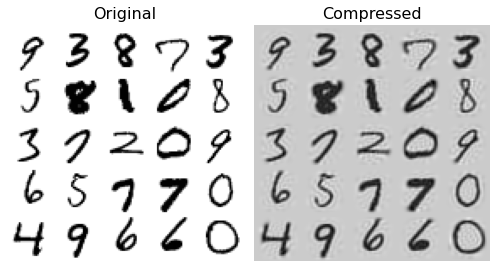

In [19]:
plt.figure(figsize=(7, 4))
plt.subplot(121)
plot_digits(X_train[::2100])
plt.title("Original", fontsize=16)
plt.subplot(122)
plot_digits(X_recovered[::2100])
plt.title("Compressed", fontsize=16)

save_fig("mnist_compression_plot")

In [30]:
X_reduced_pca = X_reduced

## 8.3.8 랜덤 PCA

`svd_solver = "randomized"` : 사이킷런은 랜덤 PCA라 부르는 확률적 알고리즘을 사용해 처음 d개의 주성분에 대한 근삿값을 빠르게 찾는다.  

In [31]:
rnd_pca = PCA(n_components=154, svd_solver="randomized", random_state=42)
X_reduced = rnd_pca.fit_transform(X_train)

## 8.3.9 점진적 PCA

- PCA 구현의 문제를 SVD 알고리즘을 실행하기 위해 전체 훈련 세트를 메모리에 올려야 한다는 것이다. 이 문제로 점진적 PCA(incremental PCA,  IPCA) 알고리즘이 개발되었다.  
    - 훈련 세트를 미치배치로 나눈 뒤 IPCA 알고리즘에 한 번에 하나씩 주입한다. 이런 방식은 훈련 세트가 클 때 유용하고 온라인으로 PCA를 적용할 수도 있다.  

In [32]:
from sklearn.decomposition import IncrementalPCA

n_batches = 100
inc_pca = IncrementalPCA(n_components=154)
for X_batch in np.array_split(X_train, n_batches):
    print(".", end="") # 책에는 없음
    inc_pca.partial_fit(X_batch)

X_reduced = inc_pca.transform(X_train)

....................................................................................................

In [33]:
X_recovered_inc_pca = inc_pca.inverse_transform(X_reduced)

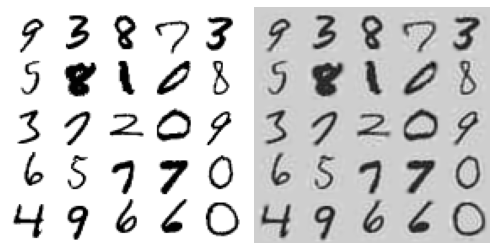

In [23]:
plt.figure(figsize=(7, 4))
plt.subplot(121)
plot_digits(X_train[::2100])
plt.subplot(122)
plot_digits(X_recovered_inc_pca[::2100])
plt.tight_layout()

In [34]:
X_reduced_inc_pca = X_reduced

일반 PCA와 점진적 PCA로 MNIST 데이터를 변환한 결과를 비교

In [35]:
np.allclose(pca.mean_, inc_pca.mean_) # 평균이 같은지

True

In [36]:
np.allclose(X_reduced_pca, X_reduced_inc_pca)

False

### `memmap()` 사용

`memmap` 파이씬 클래스를 시용해 하드 디스크의 이진 파일에 저장된 매우 큰 열을 메모리에 들어 있는 것처럼 다루는 것이다. 이 파이씬 클래스는 필요할 때 데이터를 메모리에 적재한다. `IncrementalPCA`는 특정 순간에 배열의 일부만 사용하기 때문에 메모리 부족 문제를 해결할 수 있다.  

In [37]:
filename = "my_mnist.data"
m, n = X_train.shape

X_mm = np.memmap(filename, dtype='float32', mode='write', shape=(m, n))
X_mm[:] = X_train

In [38]:
del X_mm

In [39]:
X_mm = np.memmap(filename, dtype="float32", mode="readonly", shape=(m, n))

batch_size = m // n_batches
inc_pca = IncrementalPCA(n_components=154, batch_size=batch_size)
inc_pca.fit(X_mm)

IncrementalPCA(batch_size=525, n_components=154)

# 8.4 커널 PCA (p.289)

- 커널 트릭은 샘플을 매우 높은 고차원 공간(특성 공간)으로 암묵적으로 매핑하여 SVM의 비선형 분류와 회귀를 가능하게 하는 수학적 기법이다.    
- PCA에 커널 트릭을 적용해 차원 축소를 위한 복잡한 비선형 투형을 수행할 수 잇는데 이를 커널 PCA(kPCA)라고 한다.  

In [42]:
from sklearn.datasets import make_swiss_roll
X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)

In [43]:
from sklearn.decomposition import KernelPCA

rbf_pca = KernelPCA(n_components = 2, kernel="rbf", gamma=0.04)
X_reduced = rbf_pca.fit_transform(X)

## 8.4.1 커널 선택과 하이퍼파라미터 튜닝

- kPCA는 비지도 학습이라 좋은 커널과 하이퍼파라미터를 선택하기 위한 명확한 성능 측정 기준이 없다.  
- But 차원 축소는 종종 지도학습(ex. 분류)의 전처리 단계로 활용되므로, <u>그리드 탐색</u>으로 성능이 가장 좋은 커널과 하이퍼파라미터를 선택할 수 있다.  
---  
- 다음 코드는 두 단계의 파이프라인을 만드는데, 먼저 kPCA를 사용해 차원을 2차원으로 축소하고 분류를 위해 로지스틱 회귀를 적용한다.  
- 그 뒤 파이프라인 마지막 단계에서 `GridSearchCV`로 가장 좋은 커널과 `gamma` 파라미터를 찾는다.

In [46]:
y = t > 6.9

In [47]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

clf = Pipeline([
        ("kpca", KernelPCA(n_components=2)),
        ("log_reg", LogisticRegression(solver="lbfgs"))
    ])

param_grid = [{
        "kpca__gamma": np.linspace(0.03, 0.05, 10),
        "kpca__kernel": ["rbf", "sigmoid"]
    }]

grid_search = GridSearchCV(clf, param_grid, cv=3)
grid_search.fit(X, y)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('kpca', KernelPCA(n_components=2)),
                                       ('log_reg', LogisticRegression())]),
             param_grid=[{'kpca__gamma': array([0.03      , 0.03222222, 0.03444444, 0.03666667, 0.03888889,
       0.04111111, 0.04333333, 0.04555556, 0.04777778, 0.05      ]),
                          'kpca__kernel': ['rbf', 'sigmoid']}])

In [48]:
print(grid_search.best_params_)

{'kpca__gamma': 0.043333333333333335, 'kpca__kernel': 'rbf'}


그리드 탐색 결과 `gamma`가 0.043일 때 최적이다.

**재구성**  

- `fit_transform` : fit과 transform을 합친 것으로, train data에서만 가능하다. 

- `fit()` : "훈련해라", "머신러닝이 데이터에 머신러닝 모델을 맞추는 것(fit)"  
    - 학습데이터 세트에서 변환을 위한 기반 설정을 하는 함수이다!  
    - 데이터를 학습시키는 메서드라고 생각하면 된다.  

- `transform()` : fit 을 기준으로 얻은 mean, variance에 맞춰서 변형하는것!  
    - fit을 통해 세운 기반으로 변형하는 함수!  
    - 실제로 학습시킨 것을 적용하는 메서드라고 생각하면 된다!  
    
출처 : [데이터 전처리 fit, fit_transform, transform의 개념 익히기!](https://david-kim2028.tistory.com/entry/%EB%8D%B0%EC%9D%B4%ED%84%B0-%EC%A0%84%EC%B2%98%EB%A6%AC-fit-fittransform-transform%EC%9D%98-%EA%B0%9C%EB%85%90-%EC%9D%B5%ED%9E%88%EA%B8%B0)  
참고 : [[scikit-learn] transform()과 fit_transform()의 차이는 무엇일까?](https://deepinsight.tistory.com/165)

In [49]:
# 최적의 조합으로 재구성

rbf_pca = KernelPCA(n_components = 2, kernel="rbf", gamma=0.0433, fit_inverse_transform=True) # fit_inverse_transform = True -> inverse_transform 사용
X_reduced = rbf_pca.fit_transform(X)

X_preimage = rbf_pca.inverse_transform(X_reduced)   # 재구성

In [50]:
from sklearn.metrics import mean_squared_error

mean_squared_error(X, X_preimage)   # 재구성 원성 오차

32.7863087957661

# 8.5 LLE (p.294)

- **지역 선형 임베딩(loccally linear embedding, LLE)**은 또 다른 강력한 비선형 차원 축소 기술이다.  
- 투영에 의존하지 않는 매니폴드 학습이다.  
- 먼저 각 훈련 샘플이 가장 가까운 이웃에 얼마나 선형적으로 연관되어 있는지 측정한다. 그 뒤 국부적인 관계가 가장 잘 보존되는 훈련 세트의 저차원 표현을 찾는다.  
- 매니폴드를 모델링하는 데에 잘 동작한다.  

---  
LLE는 국소적인 선형 적합으로 부터 전역적인 비선형 구조를 복원한다.(LLE revocers global nonlinear structure from locally linear fits.). 

절차(steps of locally linear embedding)는 꽤 간단하다. 

    (1단계) 각 데이터 점의 이웃을 선택 (Select neighbors)
    (2단계) 이웃으로부터 선형적으로 가장 잘 재구성하는 가중치를 계산 (Reconstruct with linear weights)
    (3단계) 가중치를 사용해 저차원의 임베딩 좌표로 매핑 (Map to embedded coordinates)

참고 : [[Python] LLE 를 통한 차원 축소 (dimensionality reduction by Locally Linear Embedding, LLE)](https://rfriend.tistory.com/752)

In [51]:
X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=41)

In [52]:
from sklearn.manifold import LocallyLinearEmbedding

lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10, random_state=42) # swiss roll 펼침
X_reduced = lle.fit_transform(X)

그림 저장 lle_unrolling_plot


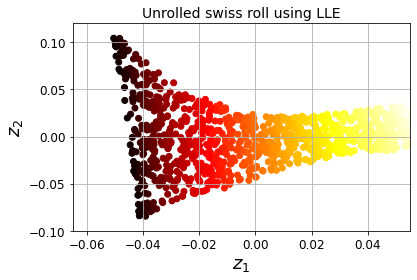

In [53]:
plt.title("Unrolled swiss roll using LLE", fontsize=14)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot)
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18)
plt.axis([-0.065, 0.055, -0.1, 0.12])
plt.grid(True)

save_fig("lle_unrolling_plot")
plt.show()

- 스위스 롤이 완전히 펼쳐졌고, 지역적으로 샘플 간 거리가 잘 보존되어 있다. 하지만 크게 보면 샘플 간 거리가 잘 유지되어 있지 않다. (오른쪽은 압축, 왼쪽은 확장되어 있음)  
- 그럼에도 LLE는 매니폴드를 모델링하는 데 잘 동작한다.  

# 8.6 다른 차원 축소 기법 (p.296)

**1. 랜덤 투영(random projection)**  
- 랜덤한 선형 투영을 사용해 데이터를 저차원 공간으로 투영한다.  
- 실제로 거리를 잘 보존하는 것으로 밝혀졌다.  

**2. 다차원 스케일링(multidimensional scaling, MDS)**  
- 샘플 간의 거리를 보존하며 차원을 축소한다.  

**3. lsomap**  
- 각 샘플을 가장 가까운 이웃과 연결하는 식으로 그래프를 만든다. 그런 다음 샘플 간의 geodesic distance를 유지하며 차원을 축소한다.  

**4. t-SNE(t-distributed stochasitc neighbor embedding)**  
- 비슷한 샘플은 가까이, 비슷하지 않은 샘플은 멀리 떨어지도록 하며 차원을 축소한다.  
- 주로 시각화에 많이 사용되고, 고차원 공간에 있는 샘플의 군집을 시각화할 때 사용된다.  

**5. 선형 판별 분석(linear discriminant analysis, LDA)**  
- 분류 알고리즘이지만, 훈련 과정에서 클래스 사이를 가장 잘 구분하는 축을 학습한다. 이 축은 데이터가 투영되는 초평면을 정의하는 데 사용할 수 있다.  
- 장점은 투영을 통해 가능한 한 클래스를 멀리 떨어지게 유지시키므로, 다른 분류 알고리즘을 적용하기 전에 차원 축소시킬 때 좋다. 


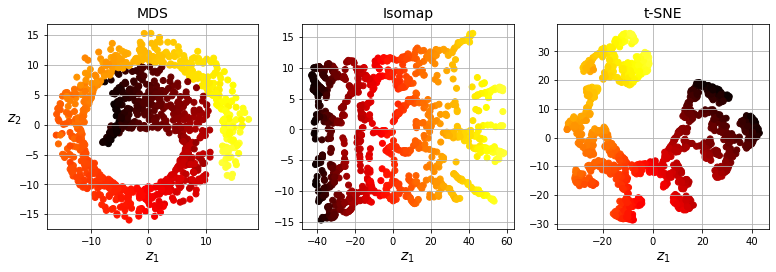

# ※ 초평면  
참고  
- [[머신러닝] 서포트 벡터 머신을 공부했다. (SVM, MMH)](https://m.blog.naver.com/tjgml1343/222030700234)  
- [초평면 (Hyperplane)](https://hsm-edu-math.tistory.com/446)